In [3]:
# Importing necessary libraries for numerical operations, data handling, plotting, and visualization aesthetics.
import numpy as np  # For numerical operations
import pandas as pd  # For handling data in DataFrame format
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For better visualization aesthetics


In [4]:
# Set the random seed to ensure the results are reproducible
np.random.seed(42)

# Define the number of data samples to generate
n_samples = 500


In [5]:
# Generating random heights between 140 cm and 200 cm
height = np.random.randint(140, 200, n_samples)

# Generating random weights between 40 kg and 100 kg
weight = np.random.randint(40, 100, n_samples)


In [6]:
# Combine height and weight into a single matrix X for features
X = np.c_[height, weight]  

# Create binary classification labels (Class 0 or 1) based on some logic with added noise
y = (height * 0.3 + weight / 3 + np.random.randn(n_samples) * 5 > 100).astype(int) 

# Store the generated data in a pandas DataFrame for better organization
data = pd.DataFrame({'Height': height, 'Weight': weight, 'Class': y})

# Display the first few rows of the dataset to inspect the data
data.head()


,Height,Weight,Class
0,178,97,0
1,191,46,0
2,168,96,0
3,154,75,0
4,182,84,0


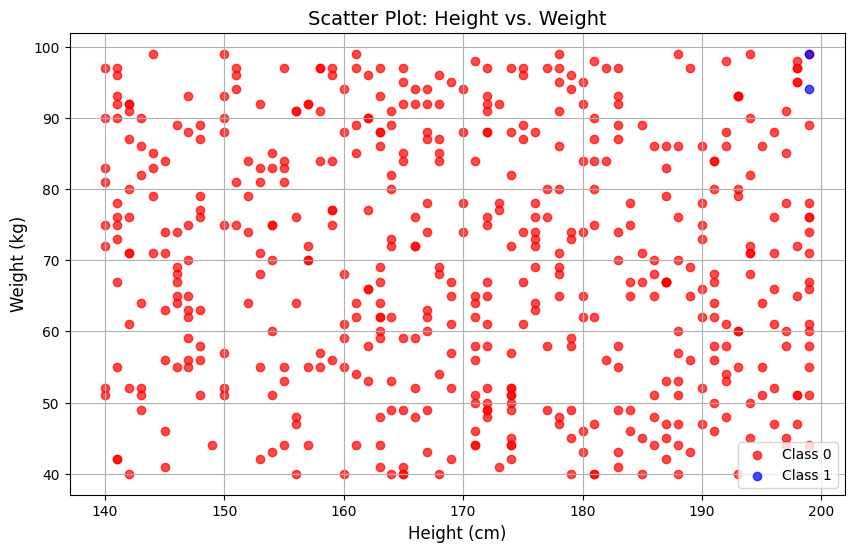

In [7]:
# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Loop through both classes (0 and 1) to color-code the points in the scatter plot
for label, color in zip([0, 1], ['red', 'blue']):
    plt.scatter(data[data['Class'] == label]['Height'],  # X-axis: Height
                data[data['Class'] == label]['Weight'],  # Y-axis: Weight
                c=color, label=f'Class {label}', alpha=0.7)  # Adding label and color

# Add a title to the plot
plt.title('Scatter Plot: Height vs. Weight', fontsize=14)
# Label the X-axis
plt.xlabel('Height (cm)', fontsize=12)
# Label the Y-axis
plt.ylabel('Weight (kg)', fontsize=12)
# Display the legend to show the class labels
plt.legend()
# Add grid for better readability
plt.grid(True)
# Show the plot
plt.show()


In [8]:
# Standardize the features: mean=0, standard deviation=1 for each feature (Height, Weight)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add an intercept term (bias) to the feature matrix X by adding a column of ones
X = np.c_[np.ones(X.shape[0]), X]


In [9]:
# Split the dataset into training (80%) and testing (20%) sets
train_size = int(0.8 * n_samples)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [10]:
# Sigmoid function: Converts input into a probability between 0 and 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [11]:
# Loss function: Computes binary cross-entropy loss between predictions and true labels
def loss_fn(X, y, beta):
    m = len(y)  # Number of training samples
    z = X @ beta  # Linear combination of features and model parameters
    predictions = sigmoid(z)  # Get predicted probabilities using sigmoid function
    # Compute the binary cross-entropy loss
    loss = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss


In [12]:
# Gradient Descent for Logistic Regression
def log_reg(X, y, beta, learning_rate, num_iterations):
    m = len(y)  # Number of training samples
    # Loop through each iteration of gradient descent
    for i in range(num_iterations):
        z = X @ beta  # Compute predictions (linear combination of inputs and parameters)
        predictions = sigmoid(z)  # Apply sigmoid to get probabilities

        # Compute gradient of the loss function with respect to the parameters
        gradient = (1 / m) * (X.T @ (predictions - y))

        # Update model parameters (beta) using the computed gradient
        beta -= learning_rate * gradient

        # Print loss every 1000 iterations for monitoring
        if i % 1000 == 0:
            loss = loss_fn(X, y, beta)
            print(f"Iteration {i}: loss {loss}")

    return beta  # Return the optimized model parameters (beta)


In [13]:
# Initialize the model parameters (beta) to zeros
beta = np.zeros(X_train.shape[1])

# Set learning rate and number of iterations for gradient descent
learning_rate = 0.01
num_iterations = 10000

# Train the logistic regression model using gradient descent
beta = log_reg(X_train, y_train, beta, learning_rate, num_iterations)


Iteration 0: loss 0.6906715433063059
Iteration 1000: loss 0.11382292114821699
Iteration 2000: loss 0.06189891437798869
Iteration 3000: loss 0.04451245075219332
Iteration 4000: loss 0.03600132024537678
Iteration 5000: loss 0.03099975491003778
Iteration 6000: loss 0.02772295685530185
Iteration 7000: loss 0.025414252788248232
Iteration 8000: loss 0.023700211359098868
Iteration 9000: loss 0.022376159474725044


In [14]:
# Function to predict class labels based on the probability threshold (default threshold = 0.5)
def predict(X, beta, threshold=0.5):
    # Compute predicted probabilities using the sigmoid function
    probabilities = sigmoid(X @ beta)
    # Return the predicted class (0 or 1) based on the threshold
    return (probabilities >= threshold).astype(int)


In [15]:
# Function to calculate accuracy by comparing true labels and predicted labels
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Predict class labels for the training and test sets
y_pred_train = predict(X_train, beta)
y_pred_test = predict(X_test, beta)

# Calculate and print the accuracy of the model on the test set
test_accuracy = accuracy(y_test, y_pred_test)

# Display the final accuracy result
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Testing Accuracy: 99.00%
